## Imports

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn import linear_model
import warnings; warnings.simplefilter('ignore')

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [107]:
df = pd.read_csv('/content/ CITY_AQI.csv')

In [108]:
df.head()

,City,Date,AQI,Population,Literacy_rate,GDP
0,Ahmedabad,2019-10-28,212,7868633,0.886364,68.0
1,Amaravati,2019-10-28,67,741000,0.920635,62.9
2,Bengaluru,2019-10-28,88,11883000,0.887097,78.0
3,Bhopal,2019-10-28,228,2333000,0.833333,4.0
4,Chennai,2019-10-28,208,10711243,0.901961,70.0


### Multiple Features (N-Dimensional)

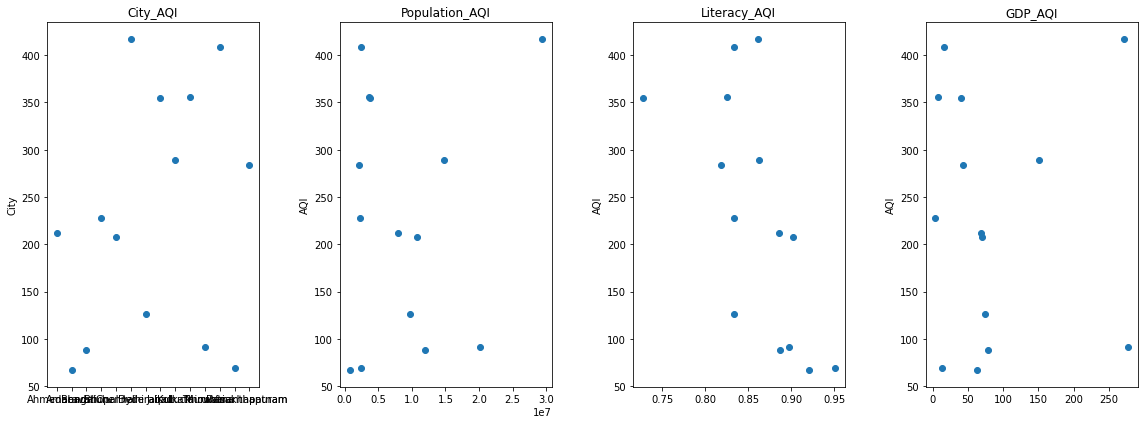

In [109]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].plot(df['City'],df['AQI'],'o')
axes[0].set_ylabel("City")
axes[0].set_title("City_AQI")

axes[1].plot(df['Population'],df['AQI'],'o')
axes[1].set_title("Population_AQI")
axes[1].set_ylabel("AQI")

axes[2].plot(df['Literacy_rate'],df['AQI'],'o')
axes[2].set_title("Literacy_AQI");
axes[2].set_ylabel("AQI")

axes[3].plot(df['GDP'],df['AQI'],'o')
axes[3].set_title("GDP_AQI");
axes[3].set_ylabel("AQI")
plt.tight_layout();

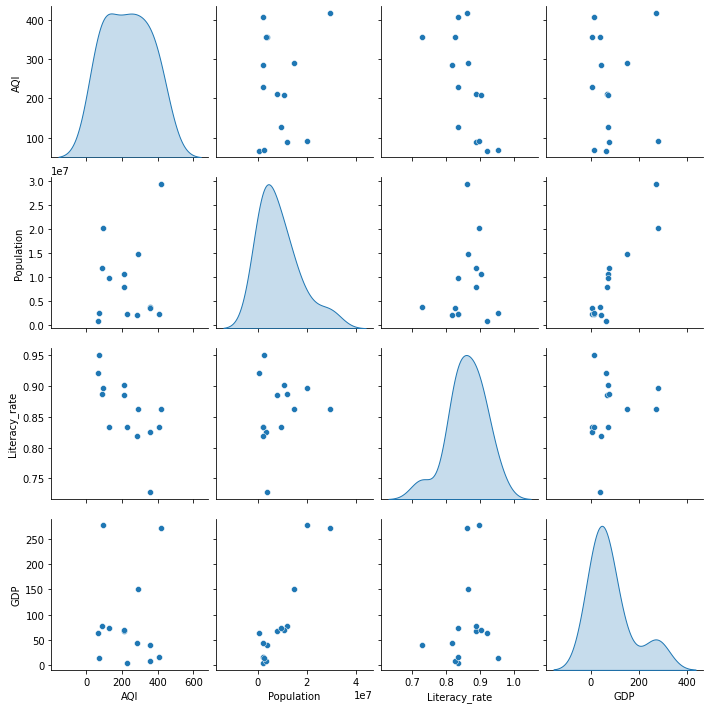

In [110]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [111]:
X = df.drop(['AQI','City','Date'],axis=1)
y = df['AQI']

## Train | Test Split


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [114]:
X_train

,Population,Literacy_rate,GDP
5,29399000,0.862069,272.00
0,7868633,0.886364,68.00
4,10711243,0.901961,70.00
8,14755000,0.863158,150.10
9,3590000,0.825000,7.68
7,3812000,0.727273,40.00
6,9741000,0.833333,74.00
1,741000,0.920635,62.90
11,2378000,0.833333,15.50


In [115]:
y_train

5     417
0     212
4     208
8     289
9     356
7     355
6     126
1      67
11    408
Name: AQI, dtype: int64

In [116]:
X_test

,Population,Literacy_rate,GDP
12,2477000,0.951220,13.6
2,11883000,0.887097,78.0
3,2333000,0.833333,4.0
13,2125000,0.818182,43.5
10,20185000,0.897436,277.0


In [117]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 12 to 10
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Population     5 non-null      int64  
 1   Literacy_rate  5 non-null      float64
 2   GDP            5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 160.0 bytes


In [118]:
y_test

12     69
2      88
3     228
13    284
10     92
Name: AQI, dtype: int64

## Creating a Model (Estimator)

#### Import a model class from a model family

In [119]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [120]:
model = LinearRegression()

### Fit/Train the Model on the training data



In [121]:
model.fit(X_train,y_train)

LinearRegression()

In [122]:
test_predictions = model.predict(X_test)

In [123]:
test_predictions

array([117.95072238, 266.46977765, 268.26802678, 250.94530484,
       196.54073938])

In [124]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [125]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [126]:
MAE

81.0567922708505

In [127]:
MSE

9578.105560074164

In [128]:
RMSE

97.86779633809154

In [129]:
df['AQI'].mean()

228.5



## Evaluation on the Test Set

### Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [130]:
# X_test

In [131]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [132]:
test_predictions

array([117.95072238, 266.46977765, 268.26802678, 250.94530484,
       196.54073938])

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [134]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [135]:
MAE

81.0567922708505

In [136]:
MSE

9578.105560074164

In [137]:
RMSE

97.86779633809154

In [138]:
df['AQI'].mean()

228.5

In [139]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [140]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

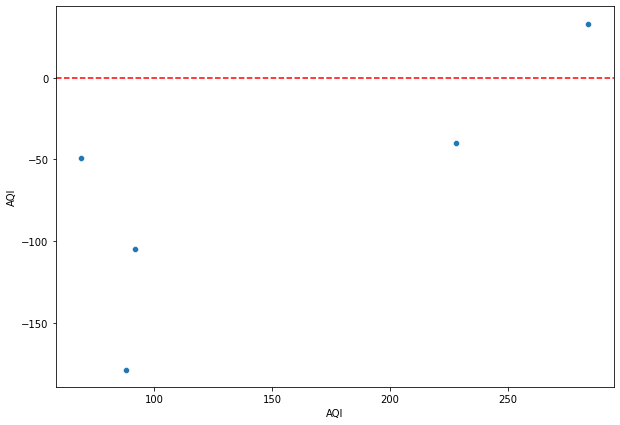

In [141]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [142]:
len(test_res)

5

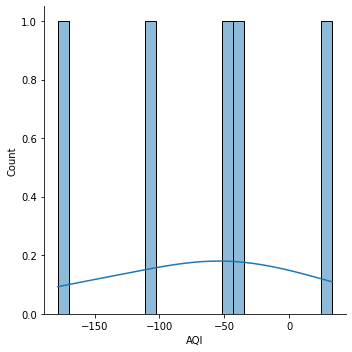

In [143]:
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [144]:
import scipy as sp

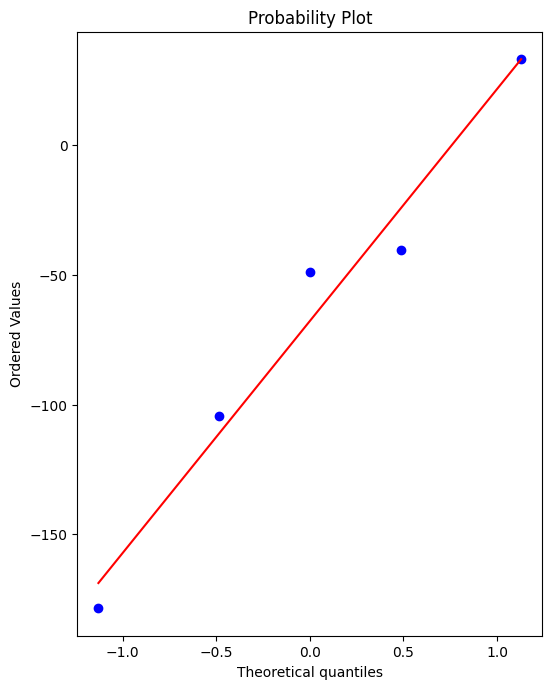

In [145]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [146]:
final_model = LinearRegression()

In [147]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [148]:
y_hat = final_model.predict(X)

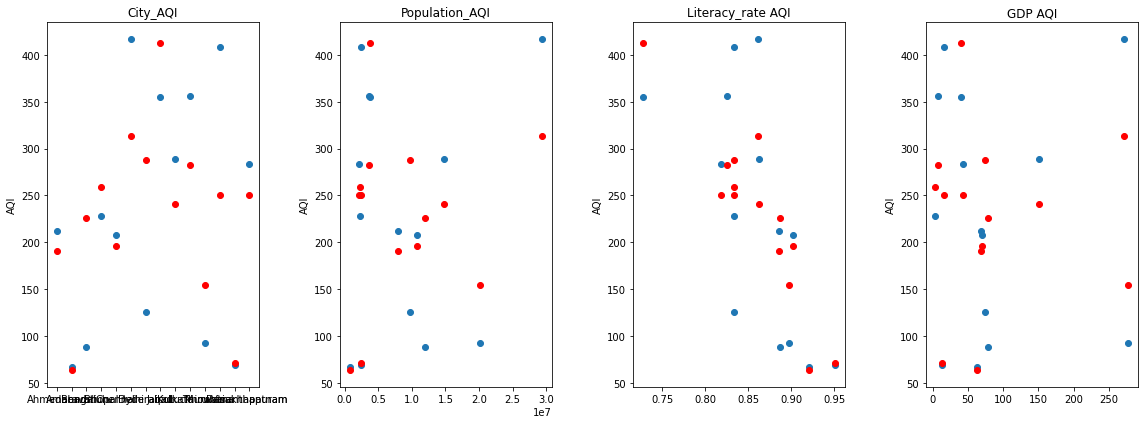

In [149]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].plot(df['City'],df['AQI'],'o')
axes[0].plot(df['City'],y_hat,'o',color='red')
axes[0].set_ylabel("AQI")
axes[0].set_title("City_AQI")

axes[1].plot(df['Population'],df['AQI'],'o')
axes[1].plot(df['Population'],y_hat,'o',color='red')
axes[1].set_title("Population_AQI")
axes[1].set_ylabel("AQI")

axes[2].plot(df['Literacy_rate'],df['AQI'],'o')
axes[2].plot(df['Literacy_rate'],y_hat,'o',color='red')
axes[2].set_title("Literacy_rate AQI");
axes[2].set_ylabel("AQI")

axes[3].plot(df['GDP'],df['AQI'],'o')
axes[3].plot(df['GDP'],y_hat,'o',color='red')
axes[3].set_title("GDP AQI");
axes[3].set_ylabel("AQI")
plt.tight_layout();

### Residuals

Should be normally distributed as discussed in the video.

In [150]:
residuals = y_hat - y

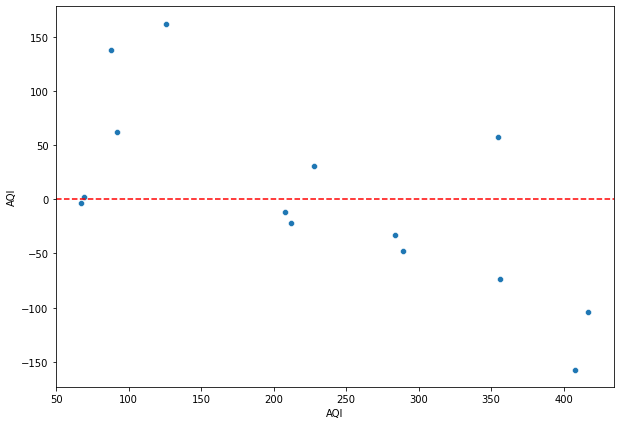

In [151]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [152]:
final_model.coef_

array([ 1.09317949e-05, -1.54378176e+03, -7.35747773e-01])

In [153]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Population,0.000011
Literacy_rate,-1543.781758
GDP,-0.735748


In [154]:
#coeff_df = coeff_df.drop('City_label')
coeff_df

,Coefficient
Population,0.000011
Literacy_rate,-1543.781758
GDP,-0.735748


In [155]:
df.corr()

,AQI,Population,Literacy_rate,GDP
AQI,1.000000,0.119966,-0.659074,0.002371
Population,0.119966,1.000000,0.169746,0.926493
Literacy_rate,-0.659074,0.169746,1.000000,0.209796
GDP,0.002371,0.926493,0.209796,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict AQI for random city


In [158]:
campaign = [[1000000,0.80,70]]

In [159]:
final_model.predict(campaign)

array([247.15530623])

In [160]:
from joblib import dump, load

In [161]:
dump(final_model, 'LinearRegression.joblib') 

['LinearRegression.joblib']

In [162]:
loaded_model = load('LinearRegression.joblib')

In [163]:
loaded_model.predict(campaign)

array([247.15530623])